# **1: Intro to DuckDB**

---

By Jean-Yves Tran | jy.tran@[datascience-jy.com](https://datascience-jy.com) | [LinkedIn](https://www.linkedin.com/in/jytran-datascience/)  
IBM Certified Data Analyst 

---

Source: 
- [Getting Started with DuckDB](https://www.packtpub.com/en-ar/product/getting-started-with-duckdb-9781803232539) by Simon Aubury & Ned Letcher
- [DuckDB documentation](https://duckdb.org/docs/)
---

The interactive links in this notebook are not working due to GitHub limitations. View this notebook with the interactive links working [here](https://nbviewer.org/github/jendives2000/Data_ML_Practice_2025/blob/main/1-3-SQL/practice/dvd_rental/3_PostGreSQL_SQLAlchemy_Biz-database_dvdrental_3.ipynb).

---

This is an introduction on DuckDB, an increasingly popular (2025) SQL toolkit. I will quickly introduce the what and the why so that I can show some SQL queries as soon as possible. 

## **SQLite for OLAP = DuckDB**
DuckDB is indeed similar to SQLite in that both are **in-process** databases that **write to a single-file** storage format and are **free and open source**.  

**Key difference**:  
SQLite is optimized for transactional **(OLTP) workloads** (it is very good at reading rows, not columns), while DuckDB is designed specifically for analytical queries because of its **optimization for OLAP workloads** (columns).
Often referred to as “SQLite for OLAP”, as it is the **first production-ready in-process OLAP DBMS**.

### **In-process**: 
Being in-process means that DuckDB runs **inside the same process as the application**, eliminating the need for a separate database service. This makes it lightweight, fast, and easy to integrate, especially for analytical **workloads where data is processed locally** rather than stored on a central database server.

**No Client-Server Communication**

Traditional databases like PostgreSQL or MySQL run as separate services (often on a remote server) and require network communication between the application and the database.
DuckDB, being in-process, does **not require network communication** because it runs directly within the application’s memory space. This makes DuckDB ideal for fast, interactive analytics on local data.

DuckDB is an **embedded, high-performance OLAP database designed for analytics, offering SQL-based querying and a simplified installation process**, making it an attractive alternative for analytical workloads compared to traditional client-server databases.

## **Why Use DuckDB**?
1. Two Main Use Cases
- **Analytical Workflows** → For data analysts, data scientists, and ML engineers, DuckDB enables fast, **scalable**, and SQL-based **data wrangling, exploration, and transformation**.  
  
- **Operational Data Infrastructure & Interactive Apps** → For data engineers and software developers, DuckDB can **power ETL** pipelines, **lightweight data lakes**, and **real-time dashboards** with low-latency analytics.

### **Use case 1: Analytical Workflows?**
- Handles **large datasets efficiently** on a single machine, **reducing the need** for complex distributed systems like Spark.
- Works out-of-core, meaning it can **process datasets larger than memory**.
- **Faster** than Pandas, Dask, and Polars **for complex** SQL-based analytics.
- Provides **DBMS features** (ACID transactions, constraints, data integrity) that **dataframe libraries lack**.

### **Enhanced Performance**
⚡ **Optimized for OLAP** → Efficient for columnar analytics, large joins, and aggregations
🔗 Seamless integration with **CSV, Parquet, JSON**, and external databases like **PostgreSQL & MySQL**
🔄 Works with **Pandas, Polars, R, and Arrow** → Bridges the gap between databases and dataframe workflows

### **Use case 2: Building Block for Data Infrastructure**
🔹 **Can replace Apache Spark in some ETL workflows** by running transformations locally
🔹 A **lightweight alternative to Google BigQuery, Snowflake, and ClickHouse** for medium-scale data warehouses
🔹 Used for **real-time dashboards & BI tools** (e.g., Mode, Hex, Rill) that need fast query performance.

### **DuckDB as a Pre-Scaling SQL Solution**
DuckDB is highly valuable for companies **until they truly need to scale out** to a cloud-based distributed system. It serves as an efficient, high-performance SQL engine for managing and analyzing data locally before cloud-scale infrastructure becomes necessary.

**When to Scale Beyond DuckDB?**
🚀 You need multi-user, concurrent access.
🚀 Your data size exceeds what can be efficiently processed on a single machine.
🚀 Your company needs cloud-native, real-time distributed processing.

### **Versatility & Other Niceties**: 

Not only can DuckDB support Parquet, CSV, and JSON formats and read/write files from disk or cloud storage (S3). It can also **connect to PostgreSQL, MySQL, and SQLite** to run queries across multiple databases.

Here are other nice things DuckDB offers (among other things):  
- **Efficient Storage** → DuckDB uses compression algorithms to reduce disk storage, improving read performance.
- **Query Optimization** → DuckDB rewrites queries for better efficiency instead of running them as written.
- **Parallel Processing** → Most operations automatically run on multiple CPU threads, speeding up queries.
- **Python-Like Syntax** → Supports simple string and list slicing, list comprehensions, and lambda functions in SQL.
- **Chained Function Calls** → Similar to pandas, allowing method-style query chaining.
- **Trailing Commas** → SQL queries support trailing commas for cleaner syntax.

### **Install and use it almost everywhere**: 
- **Multiple Client APIs**→ DuckDB supports Python, R, JavaScript, Rust, Swift, Julia, Java, C, and C++ for easy integration.
- **JavaScript Support** → Two versions: Node.js (backend use) and Wasm (runs in a web browser).
- **Command-Line Interface (CLI)** → A cross-platform executable that works on any system with a command line.
- **Community-Supported Clients** → Additional support for Go, C#, Ruby, Common Lisp, Zig, and Crystal.
- **Flexible Deployment** → Can be used in analytical workflows, operational infrastructure, and data products across diverse environments.


---

## **When not to use DuckDB**:
1. **Not for OLTP** → DuckDB is built for analytical (OLAP) workloads, not transactional (OLTP) use cases with frequent small writes. If you need an in-process OLTP database, SQLite is a better choice.

2. **Single Process Write Limitation** → Only one process can write to a DuckDB database at a time. Multiple processes can read, but only in read-only mode.

3. **Not for Petabyte-Scale Data** → While DuckDB is fast on a single machine, it’s not designed for distributed computing. If you need to process petabyte-scale data, a cloud-based or distributed system is required.  

Point 3 above means that in the following use cases, DuckDB **presents limitations**:
- **Automated Data Pipelines with Multiple Writers**
  - If multiple scripts or processes need to update a DuckDB database at the same time, this won't work.
    - Example: A real-time dashboard pulling data updates every second.

- **Collaboration on Shared Databases:**  
  - If multiple analysts or scripts need to modify the same database, **only one can write at a time**. This makes it less practical for teams working on shared datasets that require frequent updates.

- **Web Applications or BI Tools Requiring Live Data Updates:**  
  - DuckDB is **not designed for transactional updates** in web applications or dashboards. Tools like PostgreSQL or MySQL handle concurrent writes much better in these cases.



---

## **Installing DuckDB CLI**:  

Just like the CLI from Linux, DuckDB has its own CLI that can operate on any system. 
Very straightforward. In my terminal I download the binary file:  
- `Invoke-WebRequest -Uri "https://github.com/duckdb/duckdb/releases/download/v1.2.0/duckdb_cli-windows-amd64.zip" -OutFile "duckdb_cli-windows-amd64.zip"`

Then I unzip it:  
- `Expand-Archive -Path "duckdb_cli-windows-amd64.zip" -DestinationPath .
`

And I activate it with: `.\duckdb` 

My terminal now looks like this:   

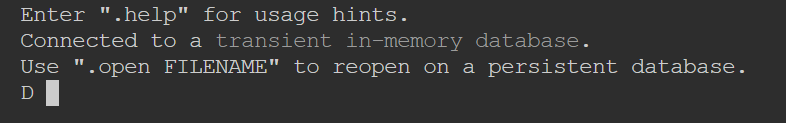

I now have access to the DuckDB interactive REPL, and start querying via its CLI.  

### **Transient in-memory?**
Noticed the sentences:  
- "Connected to a transient in-memory database"
  - This means that whatever we query, the result will NOT persist, it will NOT be saved in a file.
- 'Use ".open FILENAME" to reopen on a persistent database.'
  - if we want it to persist results, we can use that given command

However this command only works if I am already in the DuckDB CLI. An example would be: 
- `.open my_db.duckdb`: the file extension is important

If I am not in the CLI, I can also use this command: 
- `./duckdb mydb.duckdb`, which is nothing new, I used that just before

Both ways will create the said file or just open it. And any changes is automatically and safely saved in it when I close the CLI (shell).

### **Simple Queries in the CLI**:  

Here's my first query: 
`SELECT 'hello' as greeting, 'world' as name;`

It returned:  

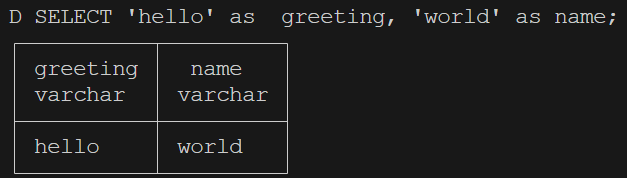


---

## **First dot command: .mode**

This .mode dot command changes the formatting used to display tables in the result output of the query. This way I can get different formats quickly like csv to json and vice-versa. 

Let's see it with html format:  
`.mode html  
SELECT 'hello' AS greeting, 'world' AS name;`  

Returning:  
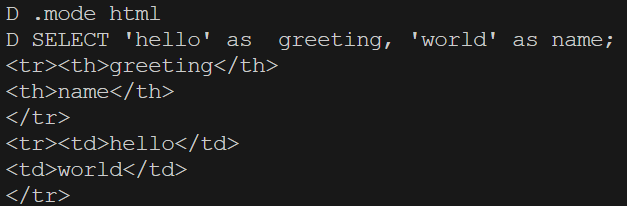

There is also the markdown format available:  
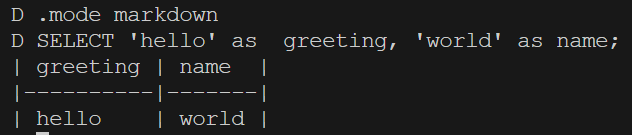

Complete formats list [here](https://duckdb.org/docs/api/cli).


---

## **Setting up DuckDB for Python**:

The DuckDB Python client provides powerful APIs to interact with DuckDB. It supports **Python function registration**, and seamless integration with **pandas, Polars, and Apache Arrow** for importing and exporting data.

**Dependencies Install:**   
In pip:  
`pip install duckdb ibis-framework jupysql jupyter-lsp jupyterlab pandas plotly polars pyarrow sqlparse`

Or use the **requirements.txt specific to duckdb** in the duckdb folder. 

**NOTE**:
**Conda install did not work** for me. 
More installation modes [here](https://duckdb.org/docs/installation).

### **Connecting to DuckDB**: 

#### **Default in-memory Database**:
This is the fastest and easiest way is to connect to DuckDB database.  
DuckDB provides a shared **in-memory** database that is **instantly available in Python** after importing the module. It’s easy to use since you don’t need to manage connections, making it great for quick data tasks or testing DuckDB. 

Let's see how to query: 

In [1]:
import duckdb

In [2]:
duckdb.sql("SELECT 'duck' AS animal, 'quack!' AS greeting")

┌─────────┬──────────┐
│ animal  │ greeting │
│ varchar │ varchar  │
├─────────┼──────────┤
│ duck    │ quack!   │
└─────────┴──────────┘

**TWO things to pay attention to**: 
- the **selected** values are in **single quote ' '**  
- the **whole query is in double quote " "** and is a Python string literal   
Keeping this convention will prevent the use of escape slashes '\'. 

The method `.sql()` tailing duckdb like so `duckdb.sql()` pointed automatically to the default already available database. We see here how convenient that is, I can just continue querying from now on, no connection to take care of. This is great for EDAs or data wrangling.  

**BUT, remember**, this is a **temporary, in-memory, database**. Once the python stops running, all data will be lost. Again, to **prevent that**, I'd need to persist the database by **creating a new persistent connection first** and not use this default database. 

#### **Explicit new database connection**: 

The other, more flexible way to connect to DuckDB is to use the: 
- `.connect()` method

It returns a connection python object that other libraries can safely and efficiently connect to too. 

In [3]:
# instantiating a connect object, effectively creating a new database:
conn = duckdb.connect()

# creating a tbale using that object: 
conn.sql(
    """
    create table hello as
    select 'pato' as animal, 'cuac' as greeting
    """
)

# querying it:
conn.sql("select * from hello")

┌─────────┬──────────┐
│ animal  │ greeting │
│ varchar │ varchar  │
├─────────┼──────────┤
│ pato    │ cuac     │
└─────────┴──────────┘

BUT, this is still an in-memory temporary database that I created. I can do more to it though, like configurate that connection in the parameters. 

#### **Database Configuration Parameters**:
I want my connection to: 
- have a max of 10GB of system memory
- and limits it to using 12 CPU threads for parallel execution

In [4]:
custom_conn = duckdb.connect(
    config={
        "memory_limit": "10GB",
        "threads": 12
    }
)

Knowing your hardware specifications helps here. DuckDB recommends the following: 
- 5GB per thread for aggregation-heavy workloads
- 10GB per thread for join-heavy workloads

So just be aware of that and assign your thread count knowingly.  My PC has a 16 core 32 threads CPU. I assigned 12 threads because I know the workload I need is light for this notebook. I may not make a performance difference at this low level though.  

For a complete [config options list](https://duckdb.org/docs/configuration).  
For DuckDB [documentation on performance](https://duckdb.org/docs/guides/performance).  

Also note that I refactored that previous code to a function. See the python file duckdb_shared_code.py. 

#### **Persistent new connection**: 

To create a database that will not disappear once you exit the python environment I just have to be explicit in the name of that database. 

In [8]:
persist_conn = duckdb.connect(
    database="quack.duckdb"
)

persist_conn.sql(
    """
    create or replace table hello as
    select 'ente' as animal, 'quak' as greeting
    """
)

persist_conn.close()

In the project folder the database appeared, showing me that it was created. 

I want to check my new table in the DuckDB shell. I can do that right in here without leaving the notebook (make sure the file duckdb.exe was NOT moved from the folder DuckDB).

In [22]:
!duckdb quack.duckdb -c "SELECT * FROM hello"

┌─────────┬──────────┐
│ animal  │ greeting │
│ varchar │ varchar  │
├─────────┼──────────┤
│ ente    │ quak     │
└─────────┴──────────┘


#### **NO multiple read processes** on disk-based DB:
This line `persist_conn.close()` is making sure that the connection process is closed, allowing another process to read the database. Without that closing line, I could NOT have been able to query via the shell like I just did.  

DuckDB **DOES NOT** allow for **multiple read** processes on a **disk-based database**. 

It is best practice to make sure you are closing your connection to any database after your work is done. 
I want to add one more row:  

In [23]:
stmt = "insert into hello values ('Fulvigula', 'quack!')"
conn = duckdb.connect(
    database="quack.duckdb"
)
conn.sql(stmt)
conn.close()

A simpler way to achieve this is to use the context manager object `with`, which automatically closes the connection:

In [24]:
stmt = "insert into hello values ('Labradorius', 'quack!')"

with duckdb.connect(database="quack.duckdb") as conn:
    conn.sql(stmt)

I refactored that with code into this function: 
- execute_stmt(stmt, db)

In [28]:
from duckdb_shared_code import execute_stmt

### **Extensions**: 

Many extensions can be installed and loaded to a database connection object. And in fact, they are installed and loaded on a **per database-connection basis**. This means that extensions are **NOT installed globally**, they are installed only on the database connections you choose to install them on.   
So for example, to install the extension `spatial` to the default database: 

In [25]:
duckdb.install_extension("spatial")
duckdb.load_extension("spatial")

To confirm these 2 actions I now need to query the corresponding database connection object, which is the default duckdb database:

In [26]:
duckdb.sql(
    """
    select *
    from duckdb_extensions()
    where loaded = true
    """
)

┌────────────────┬─────────┬───────────┬──────────────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────────────────────┬───────────┬───────────────────┬───────────────────┬────────────────┐
│ extension_name │ loaded  │ installed │                                       install_path                                       │                                    description                                     │  aliases  │ extension_version │   install_mode    │ installed_from │
│    varchar     │ boolean │  boolean  │                                         varchar                                          │                                      varchar                                       │ varchar[] │      varchar      │      varchar      │    varchar     │
├────────────────┼─────────┼───────────┼──────────────────────────────────────────────────────────────────────────────────────────┼───────────

I refactored the code to check installed and loaded extensions and to install and load one into these: 
- check_extensions()
- install_load_ext()

In [27]:
from duckdb_shared_code import check_extensions, install_load_ext


---